# Impact Of Mental Health Disorders In The Workplace

### Mental health of employees is an important determinant of their overall health. As per CDC, nearly 1 in 5 US adults (18 or older) reported any mental illness in the year 2016. Employee's poor mental health also has negative impact on the employers and businesses through increased absenteeism; causing poor productivity and low profits. This analysis would determine how commonly reported mental health issues affect employee of different ages, working with tech and non-tech companies.
### Data - https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [1]:
import pandas as pd

pd.set_option('precision', 2)  # format for floating-point values
m_health = pd.read_csv('Mental-health.csv')
m_health = m_health[['Age', 'Gender', 'self_employed', 'work_interfere', 'remote_work', 'tech_company']]
df = pd.DataFrame(m_health)

df.head(10)

,Age,Gender,self_employed,work_interfere,remote_work,tech_company
0,37,Female,NaN,Often,No,Yes
1,44,M,NaN,Rarely,No,No
2,32,Male,NaN,Rarely,No,Yes
3,31,Male,NaN,Often,No,Yes
4,31,Male,NaN,Never,Yes,Yes
5,33,Male,NaN,Sometimes,No,Yes
6,35,Female,NaN,Sometimes,Yes,Yes
7,39,M,NaN,Never,Yes,Yes
8,42,Female,NaN,Sometimes,No,Yes
9,23,Male,NaN,Never,No,Yes


In [2]:
df.tail(10)

,Age,Gender,self_employed,work_interfere,remote_work,tech_company
1249,30,M,No,Sometimes,No,Yes
1250,30,Male,Yes,Often,No,Yes
1251,36,Male,No,Often,No,No
1252,29,male,No,Sometimes,Yes,Yes
1253,36,Male,No,Rarely,No,No
1254,26,male,No,NaN,No,Yes
1255,32,Male,No,Often,Yes,Yes
1256,34,male,No,Sometimes,No,Yes
1257,46,f,No,NaN,Yes,Yes
1258,25,Male,No,Sometimes,No,No


### For the analysis, I am using the 'Age', 'work_interfere', and 'tech_company' data. First replacing any missing or bad data with suitable values i.e. mean or mode, and also checking the standard deviation for age.

## Check missing Age data

In [3]:
import math
import statistics as stat

# Checking missing or bad data as we are considering employee data
# so, here I am considering below or above 90 age is not expected.

age_count = len(m_health['Age'])
good_age = [age for age in m_health.Age if not math.isnan(age) and not(age < 15 or age > 90)]
good_age_count = len(good_age)
age_data_good = 'Yes' if age_count == good_age_count else 'No'

print('Age count given in data file:', age_count)
print('Expected data in data file:', good_age_count)
print('Is All age data good:', age_data_good)


Age count given in data file: 1259
Expected data in data file: 1253
Is All age data good: No


## Age descriptive statistics

In [4]:
df['Age'].describe()

count    1259.00
mean       30.81
std        50.82
min     -1726.00
25%        27.00
50%        31.00
75%        36.00
max       329.00
Name: Age, dtype: float64

## Measure Central tendency  of Age 

### Use the statistics module for mean

In [5]:

print('stat.mean', stat.mean(df['Age']))

stat.mean 30.8109610802224


### Compute of Age mean using definition

In [6]:
import numpy as np

age_count = len(df['Age'])

# Calculate mean
mean = df['Age'].sum()/age_count
print('Age mean' , mean)

Age mean 30.8109610802224


### Hence, the mean for 'Age' calculation is similar in both ways

## Draw box chart to represent outliers and unfiltered data

<AxesSubplot:xlabel='Age'>

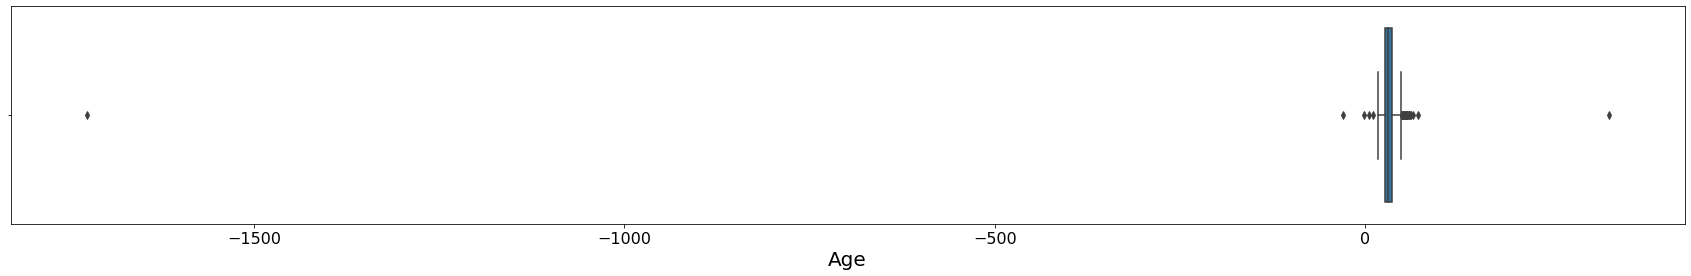

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 4))
plt.rcParams['axes.labelsize'] = 20
plt.xticks(fontsize=16)

sns.boxplot(x="Age", data=df) 


### It is necessary to clean up age data which has unexpected data, for instance, employees under 15 or older than 90. A mean value should be substituted in place of the bad data.

In [8]:

age = df['Age']

# data wrangling
mean_age = stat.mean(df['Age'])  # get the mean of age
df.loc[age<15, 'Age'] = mean_age  # put the mean value in place of unexpected value
df.loc[age>100, 'Age'] = mean_age

### Age descriptive statistics after data filter

In [9]:
df['Age'].describe()

count    1259.00
mean       32.08
std         7.27
min        18.00
25%        27.00
50%        31.00
75%        36.00
max        72.00
Name: Age, dtype: float64

### Compute Variability IQR and Standard deviation(Compute by defination and statistics module)

In [10]:
    ages    = df['Age']
    count   = len(ages)
    min_age = min(ages)
    max_age = max(ages)
    
    q1  = np.percentile(ages, 25)
    q2  = np.percentile(ages, 50)
    q3  = np.percentile(ages, 75)
    iqr = q3 - q1
    
    print('IQR', iqr)
    
    sum_of_squares = 0

    for age in ages:
        sum_of_squares += (age - mean_age)**2
    
variance = sum_of_squares/len(ages)
stdev    = math.sqrt(variance)

print(f'sum sqrs of ages = {sum_of_squares:.2f}')
print(f'variance of ages = {variance:.2f}')
print(f' std dev of ages = {stdev:.2f}')

    sd = stat.pstdev(ages)
    
print(f'std dev using module    = {sd:.2f}')

IQR 9.0
sum sqrs of ages = 68481.58
variance of ages = 54.39
 std dev of ages = 7.38
std dev using module    = 7.27


### Calculation of standard deviation we got how much age data is spread out from mean value

### Above IQR calculation represent numerical distant from the rest the age data

## Draw box chart to represent outliers and data after filter

<AxesSubplot:xlabel='Age'>

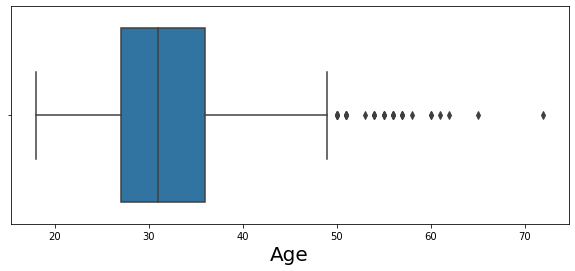

In [11]:

plt.figure(figsize=(10, 4))
sns.boxplot(x="Age", data=df) 

### As we can see in above chart that unexpected or bad values has been removed 

## Work Interference due to mental health issue data

In [12]:
w_interfere = m_health['work_interfere']
print(set(w_interfere))  # get unique value and validate the data

{nan, 'Often', 'Rarely', 'Sometimes', 'Never'}


### In the example above for unique value, there is a 'nan' value that is not valid, therefore for replacement calculating mode value

## Central tendency(mode) of work interfere 

In [13]:
import statistics as stat
most_occour_val = stat.mode(w_interfere)  # get most frequently occur value in work interfere column
print('mode of work interfere:', most_occour_val)

mode of work interfere: Sometimes


## Data wrangling (Fill the mode value in place of "nan" to make data useful)

In [14]:
df['work_interfere'] = w_interfere.replace(np.nan, most_occour_val) 


## Analysis what age people think that mental health problem impacted their work

### Divide the data between three age group less than 30, 30 to 60 and greater than 60

In [15]:
# sns.catplot(x= "work_interfere", y="Age", data=df)

# create an Empty DataFrame object
less_than_thirty_list = {'Age':[], 'work_interfere':[]}
less_than_sixty_list = {'Age':[], 'work_interfere':[]}
greater_than_sixty_list = {'Age':[], 'work_interfere':[]}

less30_Never_Count = 0
less30_Sometime_Count = 0
less30_Often_Count = 0
less30_Rarely_Count = 0

less60_Never_Count = 0
less60_Sometime_Count = 0
less60_Often_Count = 0
less60_Rarely_Count = 0

up60_Never_Count = 0
up60_Sometime_Count = 0
up60_Often_Count = 0
up60_Rarely_Count = 0

for (index, row) in df.iterrows():
    if row['Age'] < 30:
        if row['work_interfere'] == 'Never':
            less30_Never_Count += 1
        elif row['work_interfere'] == 'Often':
            less30_Often_Count += 1
        elif row['work_interfere'] == 'Rarely':
            less30_Rarely_Count += 1
        else:
            less30_Sometime_Count += 1
    elif row['Age'] < 60:

        if row['work_interfere'] == 'Never':
            less60_Never_Count += 1
        elif row['work_interfere'] == 'Often':
            less60_Often_Count += 1
        elif row['work_interfere'] == 'Rarely':
            less60_Rarely_Count += 1
        else:
            less60_Sometime_Count += 1
    else:
        if row['work_interfere'] == 'Never':
            up60_Never_Count += 1
        elif row['work_interfere'] == 'Often':
            up60_Often_Count += 1
        elif row['work_interfere'] == 'Rarely':
            up60_Rarely_Count += 1
        else:
            up60_Sometime_Count += 1
            
w_interfere = df['work_interfere'] 
w_set = set(w_interfere) # get the unique values of work interfere column
w_interfere_options = list(set(w_interfere)) # convert in list to plot in chart        


### Analysis below 30 Age employee 

<AxesSubplot:>

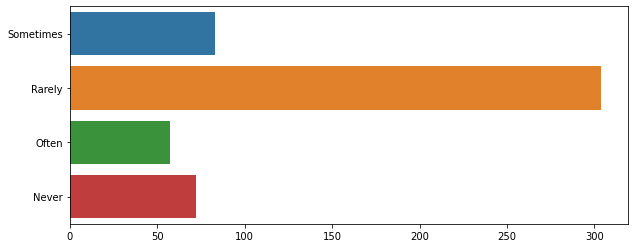

In [16]:
plt.figure(figsize=(10, 4))
sns.barplot(y=w_interfere_options, x=[less30_Never_Count, less30_Sometime_Count, less30_Often_Count, less30_Rarely_Count])

### As we can see in above chart that most of the below 30 employee think their work 'Sometimes' impacted due to mental health problem

### Analysis greater than 30 and less than 60 Age employee 

<AxesSubplot:>

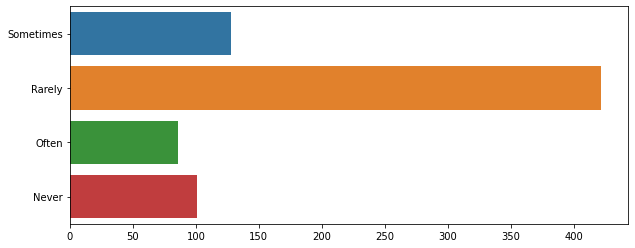

In [17]:
plt.figure(figsize=(10, 4))
sns.barplot(y=w_interfere_options, x=[less60_Never_Count, less60_Sometime_Count, less60_Often_Count, less60_Rarely_Count])

### As we can see in above chart that most of the above 30 and less than 60 age employee think their work 'Sometimes' impacted due to mental health problem

### Analysis greater than 60 Age employee 

<AxesSubplot:>

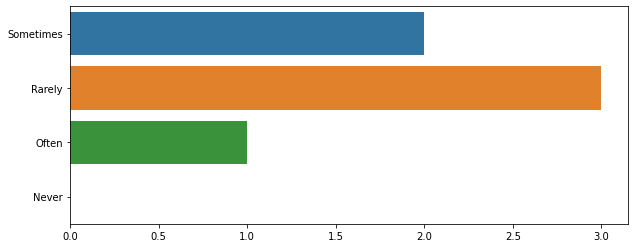

In [18]:
plt.figure(figsize=(10, 4))
sns.barplot(y=w_interfere_options, x=[up60_Never_Count, up60_Sometime_Count, up60_Often_Count, up60_Rarely_Count])

### But As we can see in above chart that most of the above 60 age employee think their work 'Sometimes' impacted due to mental health problem or even no one say 'Rarely'.

## Analysis over work interference(low productivity on work) due to mental health problem for tech employees

<AxesSubplot:>

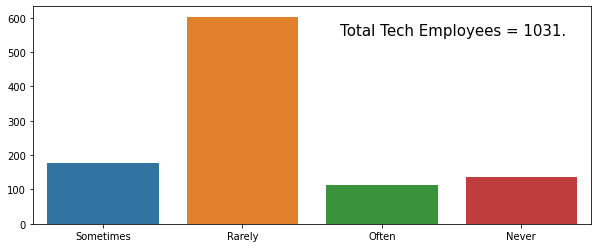

In [19]:

Never_Count = 0
Sometime_Count = 0
Often_Count = 0
Rarely_Count = 0

Non_tect_Never = 0
Non_tech_Sometime = 0
Non_tech_Often = 0
Non_tech_Rarely = 0

# differentiating tech company and non-tech company data
for index, row in df.iterrows():
    if row['tech_company'] == 'Yes':
        if row['work_interfere'] == 'Never':
            Never_Count += 1
        elif row['work_interfere'] == 'Often':
            Often_Count += 1
        elif row['work_interfere'] == 'Rarely':
            Rarely_Count += 1
        else:
            Sometime_Count += 1
    elif row['tech_company'] == 'No':
        if row['work_interfere'] == 'Never':
            Non_tect_Never += 1
        elif row['work_interfere'] == 'Often':
            Non_tech_Often += 1
        elif row['work_interfere'] == 'Rarely':
            Non_tech_Rarely += 1
        else:
            Non_tech_Sometime += 1

plt.figure(figsize=(10, 4))

text_string = "Total Tech Employees = {m}.".format(m=(Never_Count+ Sometime_Count+ Often_Count+ Rarely_Count))
#adding text inside the plot
plt.text(1.7, 550, text_string, fontsize = 15)

sns.barplot(x=w_interfere_options, y=[Never_Count, Sometime_Count, Often_Count, Rarely_Count])

## Analysis over work interference(low productivity on work) due to mental health problem for non tech employees

<AxesSubplot:>

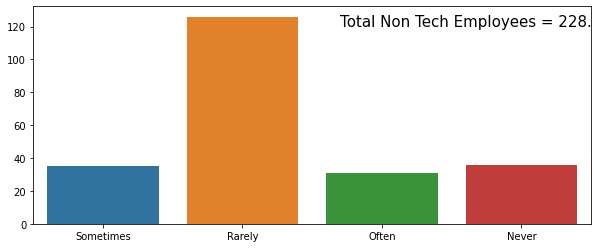

In [20]:
plt.figure(figsize=(10, 4))
text_string = "Total Non Tech Employees = {m}.".format(m=(Non_tect_Never+Non_tech_Sometime+Non_tech_Often+Non_tech_Rarely))
#adding text inside the plot
plt.text(1.7, 120, text_string, fontsize = 15)

sns.barplot(x=w_interfere_options, y=[Non_tect_Never, Non_tech_Sometime, Non_tech_Often, Non_tech_Rarely])

### As we can see in above non tech and tech bar chart their work "Often" impacted due to mental health problem but in there is 58% tech employee think their work impacted where 52% non tech employee think their work impacted due to mental health problem

### In conclusion we can say that irrespective of tech or non-tech people think their work sometimes impacted due to mental health problem and employee and employer should consider the this as serious problem.